# Основы фреймворка PyTorch. Тензоры и работа с данными.

### Февраль 2022

## Введение

Успехи современного машинного обучения, к которому относится глубокое обучение, держатся на пяти китах:
* __Данные__. Большие объёмы (размеченных, неразмеченных или слабо размеченных) данных привели к необходимости их эффективной обработки и появлению новых задач.
| Год            | Название датасета | Задача                | Размер датасета | Примечания                                                               |
|----------------|-------------------|-----------------------|-----------------|-----------------------------------------------------------------------|
| 1998           | MNIST             | Классификация         | 60K             | 10 рукописных цифр, черно-белые изображения 28х28 пикселей            |
| 2009           | CIFAR10           | Классификация         | 60K             | 10 классов, цветные изображения 32х32 пикселей                        |
| 2009           | CIFAR100          | Классификация         | 60K             | 100 классов, цветные изображения 32х32 пикселей                       |
| 2009(2014)     | ImageNet          | Классификация         | 14M(1M)         | 21K (1К) классов разного размера (как правило, 224х224 пикселя или более)     |
| 2010           | PASCAL VOC        | Детекция, сегментация | 500K            | 20 классов, разметка положения и размеров объектов (bounding box)     |
| 2015           | MS COCO           | Детекция, сегментация | 2.5М            | 91 класс                                                              |
| 2017           | Open Images       | Детекция, сегментация | 9М              | 300 классов                                                           |
| 2019 или ранее | JFT-300M          | Классификация         | 300M            | Закрытый датасет Google                                               |
| 2020           | CLIP              | Мультимодальный       | 400M            | Закрытый датасет OpenAI, содержащий изображения с текстовыми описаниями. |

* __Алгоритмы__. Для решения новых задач были разработаны новые методы. Сюда входят как архитектуры нейросетей (MLP, LeNet, AlexNet, VGG, ResNet, MobileNet, EfficientNet, Transformer, ViT, CLIP, RNN, GRU, LSTM, GAN, Автоэнкодеры, VAE и многие другие), так и методы их эффективного обучения (обратное распространение ошибки, различные алгоритмы оптимизации, распределённые вычисления, обучение с понижением точности вычислений) и инференса (дистилляция, прунинг, квантизация, тензорные декомпозиции).
* __Вычислительные средства__. Для обучения современных алгоритмов требуются значительные вычислительные ресурсы. Если простые модели на небольших датасетах можно обучать за несколько минут на обычных процессорах, то самые мощные из современных архитектур требуют несколько недель обучения на вычислительных кластерах из нескольких сотен видеокарт типа NVidia Tesla T100 или A100. Для повышения эффективности обучения моделей было разработано специальное железо - Neural Processing Units - например, Google Cloud TPU или Huawei Ascend.
* __Библиотеки и фреймворки__. Для эффективной реализации алгоритмов на вычислительных средств в разное время были разработаны фреймворки, части из которых уже устарела, а часть - только набирает силу: Caffe, Torch, Theano, TensorFlow, MXNet, PaddlePaddle, Keras, PyTorch, JAX, ONNX, MindSpore.
* __Талантливые исследователи и разработчики__. То есть, вы. Те, кто придумает новые математические методы для эффективного решения всё более сложных задач, кто сможет реализовать алгоритмы и разработать железо.

## Виды вычислительных графов

Так как нейронная сеть формализуется ациклическим ориентированным графом, то одним из важнейшим свойством фреймворка является способ исполнения вычислений для заданного графа сети. Существует два способа:
1. __Статический__. При этом способе граф сети определяется до начала обучения или инференса. Это позволяет заранее определить формулы, по которым будут вычисляться градиенты, а также проводить оптимизации на графе и добиваться более высокой производительности вычислений. К таким фреймворкам относятся Caffe, TensorFlow, MXNet, MindSpore. Недостатком этого режима являются некоторые ограничения на возможные операции и повышенная сложность отладки алгоритма.
2. __Динамический__. При этом способе в ходе выполнения операторов сети путь, по которому производится прямой проход сети (forward pass), журналируется на каждом шаге прямого прохода. На обратном проходе (backward pass) при вычислении градиентов автоматическое дифференцирование производится по журналу, записанному на прямом проходе. Такой подход обеспечивает высокую гибкость: динамическая работа модели позволяет делать различные проходы по графу модели на каждом шаге и реализовать более сложные алгоритмы. При этом отладка моделей зачастую производится проще, чем в статических фреймворках. С другой стороны, динамичность программы не позволяет оптимизировать программы настолько, насколько это возможно в статических фреймворках.

### Фреймворк PyTorch.

![alt text](seminar01-basics_extra/pytorch-logo-dark.png)

Официальный сайт: https://pytorch.org/

PyTorch ("Пайторч") - это оптимизированная библиотека тензорных вычислений с использованием GPU или CPU. PyTorch является динамическим фреймворком.

*Здесь и далее, говоря "Торч", мы будем иметь ввиду не старый фреймворк C/Lua Torch, в настоящее время не поддерживаемый, а PyTorch*

К достоинствам этого фреймворка относятся:
* Простота и удобство использования. PyTorch имеет API для Python, Java, C++. В этом курсе мы будем рассматривать примеры работы с PyTorch на Python. Механизм автоматического дифференцирования позволяет создавать и обучать модели с минимальными усилиями.
* Гибкость фреймворка делает его хорошим инструментом для проверки самых смелых идей.
* Эффективность реализации. Реализация на C++ и CUDA делает обучение достаточно эффективным.
* Удобство отладки моделей. Отладочные печати можно делать в любом месте модели.
* Большое сообщество разработчиков и большое количество свободных реализаций моделей на github. В настоящее время PyTorch является самым популярным фреймворком среди исследователей.

Но есть и недостатки и особенности, о которых следует знать:
* Фреймворки, осуществляющие статическую компиляцию графа модели (например, MindSpore), позволяют "выжать" из железа большую производительность и на практике могут обучать модели быстрее.
* Излишняя гибкость разработанной модели может вызвать трудности при портировании модели на специализированное железо.
* Так как глубокое обучение развивается очень активно, через некоторое время могут появиться более популярные и мощные фреймворки. Поэтому хороший исследователь должен с одной стороны изучать и понимать суть методов и алгоритмов, которые он использует, а с другой стороны - следить за современными средствами реализации этих алгоритмов.

### Установка PyTorch.

Рекомендуемый способ - с помощью conda.

Версия для CPU:

```
conda install pytorch torchvision torchaudio cpuonly -c pytorch
```

Версия для GPU NVidia с поддержкой CUDA:

```
conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch
```

Подробности: https://pytorch.org/get-started/locally/

Как правило, работа с фреймворками глубокого обучения состоит из следующих этапов:
1. Загрузка данных, аугментации, нормализация
2. Создание модели
3. Оптимизация параметров модели
4. Сохранение модели

Импорт модулей.

In [1]:
import torch
import numpy as np
torch.manual_seed(100)

В контексте глубокого обучения Тензором называют многомерный массив данных. В PyTorch тензором является объект класса torch.Tensor.

Многие свойства тензора являются аналогами свойств многомерных массивов numpy.

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)
print(x_data.__class__)

tensor([[1, 2],
        [3, 4]])
<class 'torch.Tensor'>


Создать тензор, заполненный единицами, и имеющий размерность другого тензора.

In [3]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 



Создать тензор, заполненный случайными числами, распределёнными равномерно на интервале [0, 1), и имеющий размерность другого тензора и тип float32.

In [4]:
x_rand = torch.rand_like(x_data, dtype=torch.float32) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[0.1117, 0.8158],
        [0.2626, 0.4839]]) 



Тоже самое, но размерность задаётся кортежем:

In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6765, 0.7539, 0.2627],
        [0.0428, 0.2080, 0.1180]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


Основные свойства тензора - его размерность, тип и устройство, в памяти которого он находится:

In [6]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


Переместить тензор на другое устройство можно с помощью метода to. При наличии GPU с поддержкой CUDA можно переместить его в видеопамять.

In [7]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

Индексация и слайсы работают точно так же, как в numpy:

In [8]:
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Конкатенация тензоров по одной из размерностей осуществляется с помощью torch.cat:

In [9]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


### Арифметические операции

Транспонирование матриц осуществляется вызовом .T

Умножение матриц - оператор @ или метод matmul.

In [10]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

In [11]:
print(y1)
print(y2)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [12]:
y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

Получить значение тензора, являющегося скаляром, можно с помощью метода item().

In [13]:
agg = y3.sum()
agg_item = agg.item()
print(agg, type(agg))
print(agg_item, type(agg_item))

tensor(48.) <class 'torch.Tensor'>
48.0 <class 'float'>


### Взаимодействие с Numpy

Преобразовать тензор в массив numpy можно с помощью метода numpy().

Важно:
1. Для возможности вызова метода numpy() тензор должен находиться в оперативной памяти (т.е. устройство - cpu). Если тензор находится в видеопамяти, его необходимо перенести в оперативную память методом cpu().
2. Если с тензором связаны градиенты (requires_grad=True), то для возможности вызова метода numpy() необходимо получить тензор без градиентов с помощью метода detach().

In [14]:
t = torch.ones(5, requires_grad=True)
if torch.cuda.is_available():
    t = t.to('cuda')
print(f"t: {t}")
n = t.detach().cpu().numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.], requires_grad=True)
n: [1. 1. 1. 1. 1.]


При этом изменения в массиве numpy будут отражаться и в тензоре PyTorch:

In [15]:
n += 2
print(f"t: {t}")
print(f"n: {n}")

t: tensor([3., 3., 3., 3., 3.], requires_grad=True)
n: [3. 3. 3. 3. 3.]


Более подробно об операциях с тензорами можно почитать здесь: https://pytorch.org/docs/stable/tensors.html

## Работа с данными.

В PyTorch существуют два основных класса для работы с данными:
* Dataset - класс хранилища данных и меток.
* DataLoader - итерируемый класс-обёртка вокруг Dataset.

Пример: загрузка датасета FashionMNIST.

Конструктор класса datasets.FashionMNIST имеет следующие параметры:
1. root - путь, где будут храниться данные
2. train - определяет обучающую или тестовую часть датасета мы будем загружать
3. download - загрузить ли данные из Интернета, если они отсутствуют в root?
4. transform - набор преобразований, применяемых к изображениям в датасете (в этом примере мы преобразуем данные в тензор)
5. target_transform - набор преобразований, применяемых к меткам в датасете (в этом примере эти преобразования отсутствуют)

In [16]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Попробуем визуализировать данные из датасета.

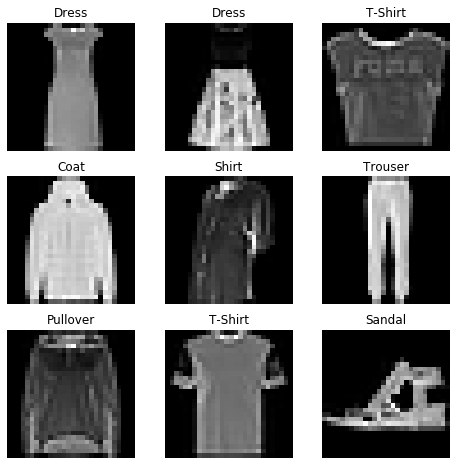

In [17]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # Случайный индекс из датасета
    img, label = training_data[sample_idx] # Обращение по такому индексу возвращает изображение и метку элемента датасета
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Класс DataLoader представляет удобный интерфейс для итерации по датасету.

In [18]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Каждая итерация по даталоадеру возвращает батч данных заданного размера. Если shuffle=True, то данные возвращаются в случайном порядке.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


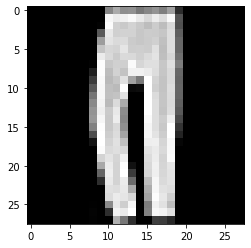

Label: 1


In [19]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Создание модели

В PyTorch как модели целиком, так и отдельные слои являются наследниками класса torch.nn.Module.

Для определения поведения слоя или модели при прямом проходе (forward pass) необходимо определить метод forward.

По-умолчанию вычисление градиентов на обратном проходе программировать не нужно, градиенты вычисляются автоматически.

Однако, если вам потребуется определить функцию, отсутствующую в PyTorch, то это можно сделать, определив метод backward в классе вашей функции.

Следующий класс задаёт простую нейронную сеть, состоящую из одной конволюции и двух полносвязных слоёв с активациями ReLU.

При вызове модуля (module(x)) автоматически вызывается метод forward.

In [20]:
from torch import nn

In [21]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=2, kernel_size=(3, 3), stride=2, padding=(1, 1), bias=True),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(14*14*2, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

Flatten - преобразование многомерного тензора в одномерный.

Conv2d - 2D-конволюция 

Linear - полносвязный слой (fully-connected)

Для того, чтобы выполнить вычисления на видеокарте, необходимо вызвать метод to.

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


In [23]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Flatten()
    (3): Linear(in_features=392, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
  )
)


Подадим на вход нашей модели случайные данные. Обратите внимание, что данные и модель должны находиться на одном и том же устройстве.

Функция Softmax выполняет softmax-преобразование данных по (в данном случае) первому измерению. Нулевое измерение - измерение батча.

$$ softmax({x_i}) = \frac{e^{x_i}}{\sum_{i=1}^{N}{e^{x_i}}} $$

In [24]:
X = torch.rand(1, 1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1])


Для лучшего понимания того, что мы сейчас сделали, давайте выполним все операции сети вручную:

Обратимся по очереди ко всем элементам контейнера linear_relu_stack (класс Sequential).

Первый слой осуществляет конволюцию с ядром 3х3, входным числом каналов 1, выходным числом каналов 2, страйдом 2, паддингом в один элемент с каждой стороны и прибавляет bias. Коэффициенты преобразования - обучаемые параметры модели.

In [25]:
x0 = model.linear_relu_stack[0](X)
print(model.linear_relu_stack[0])
print(x0.size())
print(x0[0, 0, :4, :4])

Conv2d(1, 2, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
torch.Size([1, 2, 14, 14])
tensor([[ 0.1492, -0.1432, -0.2056, -0.2613],
        [-0.2620, -0.1735, -0.3595, -0.2304],
        [-0.1403, -0.4182, -0.1868, -0.0496],
        [-0.1531, -0.3410, -0.2483, -0.2418]], grad_fn=<SliceBackward>)


После вызова ReLU отрицательные элементы стали нулями, а положительные - не изменились.

In [26]:
x1 = model.linear_relu_stack[1](x0)
print(model.linear_relu_stack[1])
print(x1.size())
print(x1[0, 0, :4, :4])

ReLU()
torch.Size([1, 2, 14, 14])
tensor([[0.1492, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000]], grad_fn=<SliceBackward>)


Следующая операция Flatten осуществляет преобразование данных к одномерному виду (кроме размерности батча)

In [27]:
x1_flatten = model.linear_relu_stack[2](x1)
print(model.linear_relu_stack[2])
print(x1_flatten.size())
print(x1_flatten[:, :10])

Flatten()
torch.Size([1, 392])
tensor([[0.1492, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]], grad_fn=<SliceBackward>)


Второй слой осуществляет (также обучаемое) линейное преобразование из размерности 14*14*2=392 в 512 и прибавляет bias.

In [28]:
x2 = model.linear_relu_stack[3](x1_flatten)
print(model.linear_relu_stack[3])
print(x2.size())
print(x2[:, :10])

Linear(in_features=392, out_features=512, bias=True)
torch.Size([1, 512])
tensor([[ 0.6794, -0.2648,  0.0146,  0.0553, -0.0939, -0.0026,  0.0516,  0.0872,
         -0.0844,  0.0019]], grad_fn=<SliceBackward>)


Ещё один ReLU.

In [29]:
x3 = model.linear_relu_stack[4](x2)
print(model.linear_relu_stack[4])
print(x3.size())
print(x3[:, :10])

ReLU()
torch.Size([1, 512])
tensor([[0.6794, 0.0000, 0.0146, 0.0553, 0.0000, 0.0000, 0.0516, 0.0872, 0.0000,
         0.0019]], grad_fn=<SliceBackward>)


И последний обучаемый полносвязный слой преобразует данные из размерности 512 в 10 (по числу выходных классов).

In [30]:
x4 = model.linear_relu_stack[5](x3)
print(model.linear_relu_stack[5])
print(x4.size())
print(x4)

Linear(in_features=512, out_features=10, bias=True)
torch.Size([1, 10])
tensor([[ 0.1096,  0.1556, -0.0888, -0.0055, -0.0934, -0.0989, -0.1668,  0.0268,
         -0.1270, -0.1192]], grad_fn=<AddmmBackward>)


Сравним полученное значение с результатом вызова всей модели:

In [31]:
print(logits)

tensor([[ 0.1096,  0.1556, -0.0888, -0.0055, -0.0934, -0.0989, -0.1668,  0.0268,
         -0.1270, -0.1192]], grad_fn=<AddmmBackward>)


Они идентичны. Таким образом, наша модель автоматически вызвала все операции из её графа и получила результат.

Посмотрим, что делает преобразование softmax:

In [32]:
pred_probab = nn.Softmax(dim=1)(logits)
print(pred_probab)
print(pred_probab.sum(dim=1))

tensor([[0.1156, 0.1210, 0.0948, 0.1030, 0.0944, 0.0938, 0.0877, 0.1064, 0.0912,
         0.0920]], grad_fn=<SoftmaxBackward>)
tensor([1.0000], grad_fn=<SumBackward1>)


Давайте посмотрим на параметры нашей модели. Проитерироваться по ним можно с помощью вызова метода named_parameters().

In [33]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Flatten()
    (3): Linear(in_features=392, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([2, 1, 3, 3]) | Values : tensor([[[[ 0.1125, -0.1528, -0.2315],
          [-0.1995,  0.0175,  0.2630],
          [-0.0895, -0.1042, -0.0384]]],


        [[[-0.0535, -0.0875,  0.0814],
          [ 0.2746,  0.2465,  0.1240],
          [ 0.0562, -0.2959,  0.0188]]]], grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([2]) | Values : tensor([-0.0695,  0.2827], grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.3.weight | Size: torch.Size([512, 392]) | Values : tensor([[ 9.7992e-03,  4.6236e-02,  2.3603e-02, -2.0550e-02, -2.8500e-02,
         -2.5807e-02, -3.7988e-02, -1.2024e-02,  3.5945e-02

## Оптимизация параметров модели

Для того, чтобы оптимизировать параметры модели (т.е. обучить сеть), нам не хватает всего несколько компонентов.

Определим лосс функцию. В нашем примере это будет кросс-энтропия:

$$ \mathrm{H}(p, q) = -\sum_{i=1}^N p_i\, \log q_i $$

In [34]:
loss_fn = nn.CrossEntropyLoss()

Определим алгоритм оптимизации.
В нашем примере это будет стохастический градиентный спуск.
Этот алгоритм реализован в классе torch.optim.SGD.
На вход его конструктора необходимо передать все обучаемые параметры модели и learning rate.

In [35]:
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Определим функцию обучения, которая будет проходить одну эпоху (т.е. один проход по всему датасету), получать предсказания модели для всех данных, вычислять лосс, градиенты лосса по параметрам модели и производить шаг алгоритма оптимизации.

Каждые 100 батчей мы будем печатать значение лосса и текущий прогресс.

In [36]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Получаем предсказания модели для данного батча
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

Теперь определим функцию, которая будет вычислять точность модели на тестовой части датасета:

In [37]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

А теперь объединим всё вместе. Произведём три эпохи обучения модели. Вызов model.train() переводит модель в режим обучения или тестирования, в зависимости от аргумента.

In [38]:
epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.325609  [    0/60000]
loss: 2.292153  [ 6400/60000]
loss: 2.296936  [12800/60000]
loss: 2.301628  [19200/60000]
loss: 2.293182  [25600/60000]
loss: 2.287861  [32000/60000]
loss: 2.280863  [38400/60000]
loss: 2.269682  [44800/60000]
loss: 2.252916  [51200/60000]
loss: 2.247829  [57600/60000]
Test Error: 
 Accuracy: 18.4%, Avg loss: 2.244631 

Epoch 2
-------------------------------
loss: 2.259610  [    0/60000]
loss: 2.221997  [ 6400/60000]
loss: 2.226863  [12800/60000]
loss: 2.181880  [19200/60000]
loss: 2.153190  [25600/60000]
loss: 2.125156  [32000/60000]
loss: 2.043537  [38400/60000]
loss: 2.036865  [44800/60000]
loss: 1.956251  [51200/60000]
loss: 1.833020  [57600/60000]
Test Error: 
 Accuracy: 60.3%, Avg loss: 1.869098 

Epoch 3
-------------------------------
loss: 1.854661  [    0/60000]
loss: 1.838099  [ 6400/60000]
loss: 1.789593  [12800/60000]
loss: 1.640451  [19200/60000]
loss: 1.563700  [25600/60000]
loss: 1.454309  [32000/600

Всё работает, модель учится. Теперь сохраним параметры обученной модели в файл ("чекпоинт").

In [39]:
checkpoint_filename = "my_model.pt"
torch.save(model.state_dict(), checkpoint_filename)

In [40]:
!ls *.pt

my_model.pt


Создадим новую модель, загрузим в неё только что сохранённые параметры и протестируем её. eval() - другой способ перевести модель в режим тестирования.

In [41]:
new_model = NeuralNetwork().eval()
state_dict = torch.load(checkpoint_filename)
new_model.load_state_dict(state_dict)

<All keys matched successfully>

In [42]:
test_loop(test_dataloader, new_model, loss_fn)

Test Error: 
 Accuracy: 65.1%, Avg loss: 1.153566 



Веса загрузились и можно использовать модель.

## Заключение

PyTorch является мощным инструментом в руках исследователя и позволяет воплощать практически любые идеи.

Документация доступна здесь: https://pytorch.org/docs/stable/index.html